# PSU IST 597: Homework 2
## Differential Privacy

### Instructions
This assignment follows the same principles as our hands-on in-class activities, and centers around concepts we've discussed in our differential privacy module.

To ensure that the notebook runs, I've defined a function your_code_here() that simply returns the number 1. Whenever you see a call to this function, you should replace it with code you have written. Please make sure all cells of your notebook run without error before submitting the assignment. If you have not completed all the questions, leave calls to your_code_here() in place or insert dummy values so that the cell does not throw an error when it runs.

When answering non-code questions, feel free to use a comment, or put the cell in Markdown mode and use Markdown.
The point value of each question is listed with the question, and these add up to 100 points. The assignment is due by 9:00am on Wednesdsay, March 24. (Each day late is a 10 point deduction.) When you have finished your assignment, please submit it via Canvas.

### Preamble

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

# Our usual dataset

adultdata = pd.read_csv("adult_with_pii (1).csv")
adultdata['DOB'] = pd.to_datetime(adultdata['DOB'], errors='coerce')
adultdata.head()

# Some useful utilities from earlier assignments

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

def your_code_here():
    return 1

## Collaboration Statement

**You are expected to work indepdently on this assignment.** Everyone should write their *own code and responses*. You may collaborate with a classmate through *high level* discussions (only). To the extent that you do so, please describe this in the collaboration statment below.

In [3]:
# In this cell (in markdown or a comment) write your collaboration statement

### Question 1 (1 point)

Write code to answer the following query:

`For each marital status in the census data, how many participants had that status?`

*Note*: "marital status" is misspelled as `Martial Status` in the column names.

*Hint*: use `unique()` to obtain the set of unique values in a column, and use `shape[0]` to count the number of rows in a dataframe.

In [5]:
adultdata = pd.read_csv('adult_with_pii (1).csv') 

adultdata['MartialStatus'].unique().shape[0]

7

### Question 2 (3 points)

Write code to return a differentially private version of your result from the last question. Use the definition of `laplace_mech`.

In [7]:
sensitivity = 1
epsilon = 0.1

adultdata['MartialStatus'].unique().shape[0] + np.random.laplace(loc=0, scale=sensitivity/epsilon)

-60.887343854619175

### Question 3 (3 points)

In the cell below, answer the following in 3-5 sentences:
- What is the privacy cost of your answer to the last question, and why?
- Does it violate privacy to release the set of unique marital status categories (i.e. the "histogram bin labels"), as we do here? Why or why not? 
- Is the answer to the above point the same for every dataset?

In [6]:
# The privacy cost of question to is epsilon = 0.1 because I only ran the function once. We have a "privacy budget" and to maintain utility it the function can only be ran a certain amount of times. 
# It does not violate privacy because of the "noise" we added to the dataset with S = 1 and Epsilon = 0.1. 
# However, this is not the case for every dataset because often more noise will be required for effective differential privacy. 

### Question 4 (5 points)

Fill in the following code block to produce graphs of the percent error introduced for each count. Your code should compute 100 differentially private answers for each marital status, and compute the percent error of those answers. The remaining code will plot histograms of the results for each status.

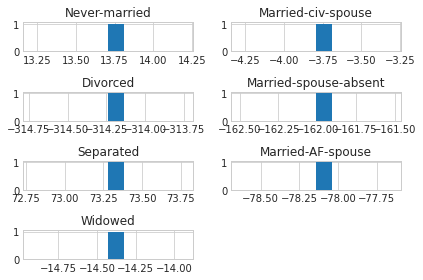

In [8]:
def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

fig = plt.figure()

dom = adultdata['MartialStatus'].unique()
for status,num in zip(dom, range(1, len(dom)+1)):
    origvals = [adultdata['MartialStatus'].unique().shape[0]]
    privvals = [adultdata['MartialStatus'].unique().shape[0] + np.random.laplace(loc=0, scale=sensitivity/epsilon)]
    errors = [(np.abs(origvals) - np.abs(privvals))/origvals * 100.0 for x in origvals]
    ax = fig.add_subplot(4,2,num)
    ax.hist(errors, bins=10)
    ax.set_title(status)

plt.tight_layout()
plt.show()

### Question 5 (3 points)

In 3-5 sentences, answer the following:
- Which marital status tends to have the largest error? Which one has the smallest error?
- What is the reason for this discrepency?
- Describe a rule of thumb for deciding when a differentially private counting query will yield an accurate result.

In [8]:
# The largest error in Martial Status seems to be Married-civ-spouse based on my code. The smallest error seems to be Separated based on my code.
# When we DP these answers we are shrinking the counts and are affecting the accuracy of the dataset.  
# A good rule of thumb for assuring accurate results if for epsilon to be as close to 0 as possible between 1 and 0.0001. 

### Question 6 (2 points)

Build a [contingency table](https://en.wikipedia.org/wiki/Contingency_table) between the `Martial Status` and `Sex` columns of the `adult_data` dataframe.

*Note*: "marital status" is misspelled as `Martial Status` in the column names.

*Hint*: use `pd.crosstab(..., ...)` (documentation [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)).

In [7]:
pd.crosstab(adultdata['MartialStatus'], adultdata['Sex'])

Sex,Female,Male
MartialStatus,,
Divorced,2672,1771
Married-AF-spouse,14,9
Married-civ-spouse,1657,13319
Married-spouse-absent,205,213
Never-married,4767,5916
Separated,631,394
Widowed,825,168


### Question 7 (3 points)

Write code to build a differentially private version of your result from the last question.

In [8]:
epsilon = 1

ct = pd.crosstab(adultdata['MartialStatus'], adultdata['Sex'])
ct.applymap(lambda x: x + np.random.laplace(loc=0, scale=sensitivity/epsilon))


Sex,Female,Male
MartialStatus,,
Divorced,2673.585883,1770.000224
Married-AF-spouse,14.600543,9.167210
Married-civ-spouse,1656.619344,13320.195315
Married-spouse-absent,205.258695,213.199888
Never-married,4763.784717,5916.328154
Separated,631.266402,391.837612
Widowed,826.928838,165.272851


### Question 8 (5 points)

Write code to display a table containing percent errors for each of the cells in your answer to the last question.

In [9]:
def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0 

epsilon = 1

origvals = pd.crosstab(adultdata['MartialStatus'], adultdata['Sex'])
privvals = origvals.applymap(lambda x: x + np.random.laplace(loc=0, scale=sensitivity/epsilon))
errors = [(np.abs(origvals) - np.abs(privvals))/origvals * 100.0 for x in origvals]
display(errors)

[Sex                      Female       Male
 MartialStatus                             
 Divorced              -0.016259   0.132978
 Married-AF-spouse     -3.426158  10.886496
 Married-civ-spouse    -0.049135   0.014042
 Married-spouse-absent  1.980102   0.163775
 Never-married         -0.001904   0.023609
 Separated             -0.446170   0.004724
 Widowed               -0.100286  -1.978096,
 Sex                      Female       Male
 MartialStatus                             
 Divorced              -0.016259   0.132978
 Married-AF-spouse     -3.426158  10.886496
 Married-civ-spouse    -0.049135   0.014042
 Married-spouse-absent  1.980102   0.163775
 Never-married         -0.001904   0.023609
 Separated             -0.446170   0.004724
 Widowed               -0.100286  -1.978096]

### Question 9 (3 points)

In 3-5 sentences, answer the following:
- What is the privacy cost of your answer to Question 7?
- For which cells does your solution produce accurate results? For which cells does it produce results with high error?

In [12]:
# The privacy cost of question to is epsilon = 1 because I only ran the function once.
# Accurate results are present in Married-civ-spouse, Never-married, Widowed, and Married-spouse-absent. High error occurs in Married-AF-spouse, Separated, and Divorced.   

### Question 10 (5 points)

Write code to produce a differentially private contingency table for three variables: `Martial Status`, `Sex`, and `Education`. Also write code to display the percent error for each cell in your table.

In [ ]:
#adapted from https://www.tutorialspoint.com/contingency-table-in-python and https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

epsilon = 0.1
def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0 

origvals = pd.crosstab(adultdata['MartialStatus'], [adultdata['Sex'], adultdata['Education']], colnames=['Sex', 'Education'], rownames=['MartialStatus'])
display(origvals)
errors = origvals.applymap(lambda x: x + np.random.laplace(loc=0, scale=sensitivity/epsilon))
display(errors)

Sex                   Female                                                   \
Education               10th 11th 12th 1st-4th 5th-6th 7th-8th 9th Assoc-acdm   
MartialStatus                                                                   
Divorced                  67   79   17       5      10      33  35        136   
Married-AF-spouse          0    0    0       0       0       0   0          2   
Married-civ-spouse        33   35   20       6      18      23  22         77   
Married-spouse-absent      7    7    4       3       5       6   3          8   
Never-married            128  248   84      12      29      34  50        161   
Separated                 31   28   12       5      11      13  17         16   
Widowed                   29   35    7      15      11      51  17         21   

Sex                                        ... Male                       \
Education             Assoc-voc Bachelors  ...  9th Assoc-acdm Assoc-voc   
MartialStatus                              ...                             
Divorced                    153       295  ...   29         67        81   
Married-AF-spouse             0         2  ...    0          0         1   
Married-civ-spouse           93       311  ...  208        383       596   
Married-spouse-absent         8        32  ...    6          4         5   
Never-married               178       869  ...  105        176       184   
Separated                    29        46  ...   16         14        13   
Widowed                      39        64  ...    6          2         2   

Sex                                                                  \
Education             Bachelors Doctorate HS-grad Masters Preschool   
MartialStatus                                                         
Divorced                    251        13     676      80         1   
Married-AF-spouse             2         0       5       0         0   
Married-civ-spouse         2457       266    4312     890        17   
Married-spouse-absent        36         4      58       8         4   
Never-married               926        38    1854     188        12   
Separated                    46         3     136      11         0   
Widowed                      18         3      70      10         1   

Sex                                             
Education             Prof-school Some-college  
MartialStatus                                   
Divorced                       34          358  
Married-AF-spouse               0            1  
Married-civ-spouse            385         2495  
Married-spouse-absent           2           30  
Never-married                  56         1492  
Separated                       5           89  
Widowed                         2           20  

[7 rows x 32 columns]

Sex                        Female                                    \
Education                    10th        11th       12th    1st-4th   
MartialStatus                                                         
Divorced               107.258491   85.561556  -4.986572  18.923916   
Married-AF-spouse      -44.399029  -29.038882   6.062666  -8.781572   
Married-civ-spouse      23.710694   34.669930  -6.055760  11.133295   
Married-spouse-absent    5.408576   11.498656  28.812158   3.368711   
Never-married          123.577281  249.396016  80.511192  12.203188   
Separated               57.068211   38.207961  13.435328   8.449108   
Widowed                 22.304805   58.630708   7.482478  16.398985   

Sex                                                                 \
Education                5th-6th    7th-8th        9th  Assoc-acdm   
MartialStatus                                                        
Divorced               42.213950  37.145560  21.016131  143.800343   
Married-AF-spouse       4.049902  30.037935 -14.729837   -4.176648   
Married-civ-spouse      0.553145  23.845698  18.250216   89.599071   
Married-spouse-absent  11.814462 -13.569308   9.154115    9.612218   
Never-married          30.471913  41.533593  51.658735  164.083782   
Separated              15.778789  11.395547  28.075632   15.986378   
Widowed                22.476503  63.559888  -9.378061   25.012021   

Sex                                            ...        Male              \
Education               Assoc-voc   Bachelors  ...         9th  Assoc-acdm   
MartialStatus                                  ...                           
Divorced               153.899370  301.767236  ...   46.384814   67.825318   
Married-AF-spouse        3.530660    1.982113  ...  -17.604200   -3.452263   
Married-civ-spouse      87.378412  301.324018  ...  212.046741  386.060110   
Married-spouse-absent   -9.502256   14.451922  ...   15.856331    7.204876   
Never-married          191.770910  881.777336  ...  112.170266  188.968705   
Separated               37.589297   51.090647  ...   16.488669   10.448796   
Widowed                 42.405795   59.659801  ...   30.201525   17.915275   

Sex                                                                      \
Education               Assoc-voc    Bachelors   Doctorate      HS-grad   
MartialStatus                                                             
Divorced                69.859064   243.794212   33.123660   673.262682   
Married-AF-spouse       -9.235002    16.132185   -9.267491    -1.958832   
Married-civ-spouse     601.308798  2461.680795  271.592648  4321.605705   
Married-spouse-absent  -32.967592    22.023589    5.104745    72.487289   
Never-married          180.789397   918.664547   32.912552  1872.415041   
Separated               -1.204525    45.052693    2.585389   136.584308   
Widowed                 10.104156    13.422133    0.811613    61.934856   

Sex                                                                    
Education                 Masters  Preschool Prof-school Some-college  
MartialStatus                                                          
Divorced                80.846846  -3.552746   25.892164   363.437118  
Married-AF-spouse        6.136967   5.074285   10.657327     6.218182  
Married-civ-spouse     874.806050  30.287045  427.506172  2495.481873  
Married-spouse-absent   30.532138 -15.679633  -21.019200    24.099129  
Never-married          192.120698  -8.351582   70.356958  1492.065561  
Separated               -0.668378 -21.857578   -3.143807    93.989253  
Widowed                 -1.714187   1.262078   -5.357027    18.832128  

[7 rows x 32 columns]

### Question 11 (5 points)

In 5-10 sentences, answer the following:
- What is the privacy cost of your differentially private contingency table in Question 10? Why?
- The contingency table in the last question contains 3 variables, compared to 2 in the table from earlier. Is the privacy cost for the table in Question 10 different from the privacy cost in Question 7? Why or why not?
- In general, what is the effect of the number of variables in a single contingency on **privacy cost**? Why is this the case?
- In general, what is the effect of the number of variables in a single contingency on **accuracy**? Why is this the case?

In [14]:
# The privacy cost of question to is epsilon = 0.1 because I only ran the function once and this is what I defined as epsilon. 
# Yes the privacy cost is different from question 7 because in this question epsilon=0.1 and in 7 epsilon=1. 
#

### Question 12 (2 points)

Define a function `z_clip` that clips elements of its input to lie below `b`. You may assume that no input will be less than 0.

In [11]:
def z_clip(xs, b):
    return xs.clip(lower=0, upper=b)

### Question 13 (3 points)

Write code to (1) clip the values of the `Capital Gain` column of the dataset, and (2) compute the average of the clipped values. Run your code for various values of the clipping parameter `b`.

In [68]:
adultdata['Capital Gain'].mean()

1077.6488437087312

In [76]:
cg = adultdata['Capital Gain']

adultdata['Capital Gain'].clip(lower=0, upper=125).mean()


10.409201191609593

In [58]:
adultdata['Capital Gain'].clip(lower=0, upper=150).mean()

12.486840084763982

In [59]:
adultdata['Capital Gain'].clip(lower=0, upper=200).mean()

16.642117871072756

In [80]:
adultdata['Capital Gain'].clip(lower=0, upper=99999).mean()

1077.6488437087312

### Question 14 (5 points)

Write code to return the differentially private average of `Capital Gain` parameterized by the clipping parameter `b`. Run your code for various values of `b` and determine the error introduced for each value of `b`. 

*Note*: Your output should look something like the triple ('b', 'answer', 'pct_error').

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

adultdata = pd.read_csv('adult_with_pii (1).csv') 

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity/epsilon)
epsilon = 0.01
sensitivity = 1
epsilon_i = .01
([laplace_mech(adultdata['Capital Gain'].clip(lower=0, upper=i).sum(), i, epsilon_i) for i in range(25)])


[0.0,
 2621.1000258490744,
 4484.387210442047,
 8180.232069552753,
 10711.201313466601,
 13289.051928752144,
 16159.118036118016,
 18573.92601646359,
 21420.537401770995,
 25073.113958184636,
 27374.950705253603,
 31429.370270418174,
 33566.435199542466,
 35373.65130831893,
 40768.74771233392,
 38254.36534425585,
 44098.336759960264,
 45361.15699206441,
 49154.483821537404,
 50854.444210984446,
 52730.09429219698,
 56311.02432863974,
 61858.65899935576,
 62404.28748214533,
 69148.11307534536]

### Question 15 (5 points)

In 5-10 sentences, answer the following:

- In Question 13, at approximately what value of the clipping parameter `b` does the clipped average approach the original (un-clipped) average?
- What is the sensitivity of the clipped average at this value of `b`, and why?
- In Question 14, at approximately what value of the clipping parameter `b` is the error minimized?
- Which seems to be more important for accuracy - the value of `b` or the scale of the noise added? Why?
- Do you think the answer to the previous point will be true for every dataset? Why or why not?

In [18]:
# In this cell (in markdown or a comment) write your reponses.

### Question 16 (10 points)

Write a function `auto_avg` that returns the differentially private average of an array of values `xs`. Your function should **automatically** determine the clipping parameter `b`, and should enforce differential privacy for a **total** privacy cost of `epsilon`.

In [19]:
def auto_avg(xs, epsilon):
    return your_code_here()

### Question 17 (8 points)

In 5-10 sentences, answer the following:
- Summarize (1-2 sentences only) your approach in `auto_avg`.
- Briefly argue that your implementation has privacy cost of `epsilon`.
- How close is your function able to get to the "best" result you got in Question 14? What accounts for the difference?
- Will your approach work well for **all** datasets? If not, describe a dataset for which it is likely to return very inaccurate results.

In [20]:
# In this cell (in markdown or a comment) write your reponses.

### Question 18 (3 points)

Consider the code below, which graphs the total privacy cost of an averaging attack under (1) sequential composition and (2) advanced composition, for values of `k` between 1 and 200.

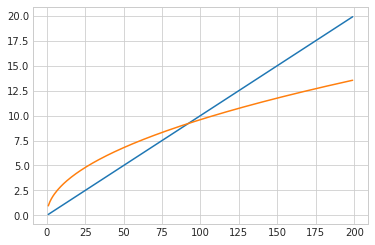

In [21]:
epsilon = .1
delta_p = 1e-5

def query():
    return len(adult_data[adult_data['Martial Status'] == 'Divorced'])

def avg_attack(k):
    return np.mean([laplace_mech(query(), 1, epsilon) for i in range(k)])
    
xs = range(1, 200)
privacy_cost_sequential = [k * epsilon for k in xs]
privacy_cost_advanced = [2 * epsilon * np.sqrt(2 * k * np.log(1/delta_p)) for k in xs]

plt.plot(xs, privacy_cost_sequential);
plt.plot(xs, privacy_cost_advanced);

In 2-5 sentences, answer the following:
- At approximately what point do the lines representing the two approaches cross? What does this mean about **which** composition technique should be used for an iterative algorithm?
- The two lines represent **different** privacy costs for the **same** algorithm. How can both be correct?

In [22]:
# In this cell (in markdown or a comment) write your reponses.

### Question 19 (3 points)

In the cell below, define a function that implements the vector version of the Laplace mechanism.

In [23]:
def laplace_mech_vec(qs, sensitivity, epsilon):
    return your_code_here()

### Question 20 (3 points)

In the cell below, define a function that implements the vector version of the Gaussian mechanism.

In [24]:
def gaussian_mech_vec(qs, sensitivity, epsilon, delta):
    return your_code_here()

### Question 21 (4 points)

Consider the code below, which defines three average queries and runs them on `adult_data`.

In [35]:
b_capgain = 3000
b_year = 3000
b_age = 3000

n = len(adult_data)

def query1():
    return np.sum(z_clip(adult_data['Capital Gain'], b_capgain))/n

def query2():
    return np.sum(z_clip(adult_data['DOB'].dt.year, b_year))/n

def query3():
    return np.sum(z_clip(adult_data['Age'], b_age))/n

def my_query():
    return [query1(), query2(), query3()]

my_query()

[3.071158748195694e-05, 3.071158748195694e-05, 3.071158748195694e-05]

In 2-5 sentences, answer the following:
- What is the $L_1$ sensitivity of `my_query`, and why?
- What is the $L_2$ sensitivity of `my_query`, and why?

In [36]:
# In this cell (in markdown or a comment) write your reponses.

### Question 22 (6 points)

In the cell below, write code to release the results of calling `my_query()` with differential privacy, without using sequential composition.

*Hint*: use `laplace_mech_vec`, but be careful of sensitivity!

In [37]:
your_code_here()

1

### Question 23 (4 points)

In 2-5 sentences, answer the following:
- What is the total privacy cost of your answer to Question 22, and why?

### Question 24 (6 points)

In the cell below, write code to release the results of `my_query()` with differential privacy, but using the Gaussian mechanism.

In [29]:
your_code_here()

1

### Extra Credit

You may earn up to 10 points of extra credit on this homework by providing *narrated proofs* of the Sequential and Parallel Composition Theorems. You must prove the Theorems as they are stated on the class slides, following the same notation. Understanding that these proofs are well-known and you may look them up, I am requesting that you *narrate* your proof completely.  That is, for each step in the proof, provide narrative justification for this step. The proof of each Theorem will be graded on a 5 point scale.

You should upload your proofs as a separate file. Please type your responses. You may use LaTeX or Word. The same collaboration guidelines apply here. You are required to work indepedently.

In [8]:
# Please submit your reponses via separate file.